In [1]:
import pandas as pd
import gensim as gn
import numpy as np
from gensim import corpora
#from pprint import pprint
import spacy 
# stop words and lda stuff 
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import re
import logging
import matplotlib.pyplot as plt 
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s')
logging.root.setLevel(level=logging.INFO)
stop_words = stopwords.words('english')
stop_words = stop_words + ['com', 'edu', 'subject', 'lines', 'organization', 'would', 'article', 'could',
                           'The','This','use','As','While','We','These','A','et.',]
nlp = spacy.load('en_core_web_sm') 

In [15]:
data = pd.read_csv("inclusion_data.csv")
data=data.iloc[:,1:]

data2= pd.read_csv("inclusion_data_finalabstractcut (1).csv")

data2=data2.iloc[:,1:]
data2

,abstract
0,The Benefits of Enlightenment: A Strategic Pe...
1,Beyond instructional practices: Characterizin...
2,Educating Students in Technology Enhanced Lea...
3,"Can a Brief, Digital Skill Training Intervent..."
4,"Course Design, Quality Matters Training, and ..."
...,...
690,Using Team-Based Learning in Discussion and W...
691,The Business of Translation: The Johns Hopkin...
692,Creating a Transformative Learning Experience...
693,The Educational Value of the College Fed Chal...


In [16]:
import spacy 
text = "I am training on nlp'" 
text1 = "I did the training on nlp'" 

# Load the English language model in spaCy when on goku change sm to trf for bigger library 
nlp = spacy.load('en_core_web_sm') 

# Create a Doc object 
doc = nlp(text1)

# Lemmatize each token and print the result 
for token in doc: 
    lemma = token.lemma_ 
    print(token.text, "-->", lemma)

I --> I
did --> do
the --> the
training --> training
on --> on
nlp --> nlp
' --> '


In [17]:

gist_file = open("stop.txt", "r")

content = gist_file.read()
stopwords_online = content.split(",")
gist_file.close()


2024-04-24 09:07:52,103 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2024-04-24 09:07:52,124 : INFO : built Dictionary<3926 unique tokens: ['account', 'achievement', 'active', 'additionally', 'advocate']...> from 191 documents (total 21156 corpus positions)
2024-04-24 09:07:52,125 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<3926 unique tokens: ['account', 'achievement', 'active', 'additionally', 'advocate']...> from 191 documents (total 21156 corpus positions)", 'datetime': '2024-04-24T09:07:52.125790', 'gensim': '4.2.0', 'python': '3.7.3 (default, Mar 27 2019, 22:11:17) \n[GCC 7.3.0]', 'platform': 'Linux-4.15.0-175-generic-x86_64-with-debian-buster-sid', 'event': 'created'}


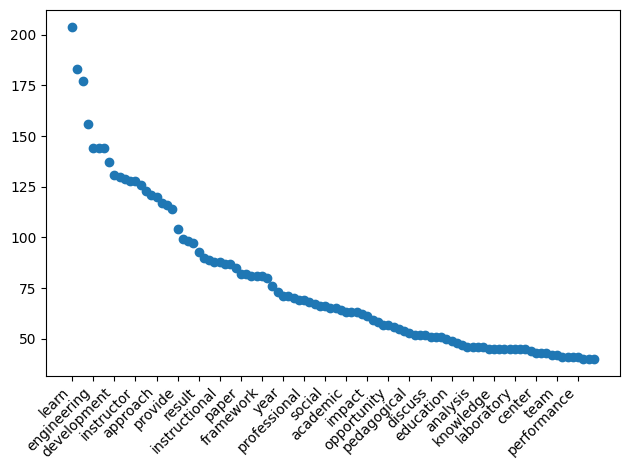

In [18]:
data_processed = []
# puncuation = [",",".",":","!",")","(",'"','?','-',"'"] #  also why capital letters not same as lower case for sample 120(only lower case stop words)( not sure if it will make a big differnece ???
stop_words = stopwords.words('english')
stop_words = stop_words + stopwords_online + ['student', 'teaching','design','learning','practice','base','lab'
                                             ,'education','study','']
# ['com', 'edu', 'subject', 'lines', 'organization', 'would', 'article', 'could',
#                            ,'this','use','as','while','we','these','et.','student','study','course'
#                           ,'teach','education','learn','university','&','learning']
[]
lemmatize = WordNetLemmatizer().lemmatize # also when lammatize, doesnt see Learn and lean as the same so how to lower case everything 


for num,doc in enumerate(data['abstract']):
    doc_out = []
    n_doc = nlp(doc) 

    ###
    for wd in n_doc:
        if wd.is_alpha == False:
            continue 
       
        lemmatized_word = wd.lemma_ 
        if lemmatized_word not in stop_words:  # remove stopwords 

            doc_out = doc_out + [lemmatized_word.lower()] 
        else:
             continue
    data_processed.append(doc_out)

    
# creating corpus and dictionary
dit = corpora.Dictionary(data_processed)
corpus = [dit.doc2bow(line) for line in data_processed]
r_corpus = [[(dit[id], count) for id, count in line] for line in corpus]

#creating word and word count of whole data to graph.
word = []
word_count = []
for abstract in r_corpus:
    for pair in abstract:
        if pair[0] not in word:
            word.append(pair[0])
            word_count.append(pair[1])
        if pair[0] in word:
            word_count[word.index(pair[0])] +=pair[1]
#making dataframe            
bow=pd.DataFrame({'count': word_count}, index=word)
bow_50 = bow.sort_values(by='count', ascending=False)


plt.scatter (bow_50.index[:100],bow_50['count'][:100])
plt.xticks(rotation=45, ha='right') 
stride = 4  # Adjust this value as needed to make x axis more readable 
plt.gca().set_xticks(plt.gca().get_xticks()[::stride])
plt.tight_layout()
plt.show()

###  build test cases from first 2 abstracts and solve them then compare to spacy and nltk 

In [19]:
lda_model = gn.models.LdaMulticore(corpus=corpus,
                         id2word=dit,
                         random_state=100,
                         num_topics=5,
                         passes=10,
                         chunksize=1000,
                         batch=False,
                         alpha='asymmetric',
                         decay=0.5,
                         offset=64,
                         eta=None,
                         eval_every=0,
                         iterations=100,
                         gamma_threshold=0.001,
                         per_word_topics=True)


# See the topics
lda_model.print_topics(-1)


2024-04-24 09:07:52,940 : INFO : using asymmetric alpha [0.33283758, 0.22998512, 0.17569299, 0.14213862, 0.11934563]
2024-04-24 09:07:52,942 : INFO : using symmetric eta at 0.2
2024-04-24 09:07:52,944 : INFO : using serial LDA version on this node
2024-04-24 09:07:52,949 : INFO : running online LDA training, 5 topics, 10 passes over the supplied corpus of 191 documents, updating every 55000 documents, evaluating every ~0 documents, iterating 100x with a convergence threshold of 0.001000
2024-04-24 09:07:52,969 : INFO : training LDA model using 55 processes
2024-04-24 09:07:53,425 : INFO : PROGRESS: pass 0, dispatched chunk #0 = documents up to #191/191, outstanding queue size 1
2024-04-24 09:07:53,651 : INFO : topic #0 (0.333): 0.002*"university" + 0.002*"science" + 0.002*"model" + 0.002*"engineering" + 0.002*"approach" + 0.002*"change" + 0.001*"learn" + 0.001*"online" + 0.001*"faculty" + 0.001*"undergraduate"
2024-04-24 09:07:53,652 : INFO : topic #1 (0.230): 0.002*"instructor" + 0.00

[(0,
  '0.009*"learn" + 0.008*"university" + 0.008*"faculty" + 0.006*"change" + 0.006*"engineering" + 0.006*"science" + 0.006*"technology" + 0.006*"high" + 0.006*"development" + 0.006*"model"'),
 (1,
  '0.002*"risk" + 0.002*"instructor" + 0.002*"active" + 0.002*"seamless" + 0.002*"performance" + 0.001*"classroom" + 0.001*"learn" + 0.001*"arithmetic" + 0.001*"class" + 0.001*"remedial"'),
 (2,
  '0.006*"abstract" + 0.005*"science" + 0.004*"community" + 0.004*"curriculum" + 0.004*"experience" + 0.004*"network" + 0.004*"technology" + 0.003*"undergraduate" + 0.003*"provide" + 0.003*"approach"'),
 (3,
  '0.001*"learn" + 0.001*"change" + 0.001*"assessment" + 0.001*"program" + 0.001*"technology" + 0.001*"process" + 0.001*"experience" + 0.001*"science" + 0.001*"high" + 0.001*"undergraduate"'),
 (4,
  '0.004*"intelligence" + 0.001*"social" + 0.001*"teacher" + 0.001*"faculty" + 0.001*"impact" + 0.001*"learn" + 0.001*"development" + 0.001*"method" + 0.001*"constructive" + 0.001*"program"')]

# Comparing lemma functions from diff libraries 

In [20]:
nlp(data['abstract'][3])

 Course Design, Quality Matters Training, and Student Outcomes.Hollowell, Gail P. and Brooks, Racheal M. and Anderson, Yolanda B. North Carolina Central University (NCCU) recognized the need to address the increasing rates of Ds, Fs, and Withdrawal by students matriculating in online courses. Led by two science faculty, a faculty learning community in partnership with the NCCU Division of Extended Studies was created to assess online science course offerings and instruction. Faculty within this learning community completed the Quality Matters (QM) “Applying the Quality Matters Rubric” course. This online training course, coupled with services provided by the NCCU Division of Extended Studies, offered the faculty learning community a variety of pedagogical strategies to meet their instructional needs. All faculty participating in this learning community completed the online training course and all faculty indicated that they implemented changes in their subsequent online course offering

Course Design, Quality Matters Training, and Student Outcomes.Hollowell, Gail P. and Brooks, Racheal M. and Anderson, Yolanda B. North Carolina Central University (NCCU) recognize the need to address the increase rates of Ds, Fs, and Withdrawal by student matriculate in online course. Led by two science faculty, a faculty learn community in partnership with the NCCU Division of Extended Studies was create to assess online science course offer and instruction. Faculty within this learn community complete the Quality Matters (QM) “Applying the Quality Matters Rubric” course. This online train course, couple with service provide by the NCCU Division of Extended Studies, offer the faculty learning community a variety of pedagogical strategies to meet their instructional need. All faculty participate in this learn community complete the online train course and all faculty indicate that they implemente changes in their subsequent online course offer. This article describe the impact of that train and the application of quality course design standards in the Quality Matters Rubric on the design and student outcomes for an Introductory Biology course over four terms. As faculty learn communities are broadly utilize, it is anticipate that this article may present an effective strategy to increase the quality and quantity of online science, technology, engineering and mathematics (STEM) courses at similar institution. 

In [21]:
data_processed[3][20:30]

['increase',
 'rate',
 'ds',
 'fs',
 'withdrawal',
 'matriculate',
 'online',
 'lead',
 'science',
 'faculty']

In [22]:
nlp(data['abstract'][7])

 Cumulative Cross Course Exposure to Evidence-Based Teaching is Related to Increases in STEM Student Buy-in and Intent to Persist.Reeves, Philip M. and Cavanagh, Andrew J. and Bauer, Melanie and Wang, Cong and Graham, Mark J. A growing body of evidence had demonstrated that increased student exposure and commitment to evidence-based teaching (EBT) leads to improved academic performance, greater persistence, and higher buy-in to instructional methods. Despite the increasing number of teaching development opportunities available to STEM instructors, which often encourage the use of EBT, implementation is still highly variable across instructors. The frequency with which students are exposed to EBT across multiple courses in a department or university has not been studied in relation to students' success in a given course or their ultimate persistence in STEM. This study shows that there is a cumulative benefit of exposure to EBT across multiple courses. Students who are frequently expose

Cumulative Cross Course Exposure to Evidence-Base Teaching is Relate to Increase in STEM Student Buy-in and Intent to Persist.Reeves, Philip M. and Cavanagh, Andrew J. and Bauer, Melanie and Wang, Cong and Graham, Mark J. A grow body of evidence had demonstrate that increase student exposure and commitment to evidence-base teaching (EBT) leads to improve academic performance, great persistence, and high buy-in to instructional methods. Despite the increase number of teaching development opportunities available to STEM instructors, which often encourage the use of EBT, implementation is still highly variable across instructors. The frequency with which students are exposed to EBT across multiple courses in a department or university has not been studied in relation to students' success in a given course or their ultimate persistence in STEM. This study shows that there is a cumulative benefit of exposure to EBT across multiple courses. Students who are frequently exposed to EBT also find these practices to be more valuable and report a higher intention to persist in STEM. If students demonstrate higher commitment after multiple EBT exposures, this may increase the likelihood that faculty will incorporate these teaching practices into their courses. The findings are useful for instructors, faculty, department chairs, and administrators who are attempting to support a more unified, evidence-based approach to teaching in their department or institution.

In [23]:
data_processed[7][20:30]

['graham',
 'mark',
 'grow',
 'body',
 'evidence',
 'demonstrate',
 'increase',
 'exposure',
 'commitment',
 'evidence']

In [24]:
data_processed[7][30:40]

['ebt',
 'lead',
 'improve',
 'academic',
 'performance',
 'great',
 'persistence',
 'high',
 'buy',
 'instructional']

As we can see SPacy is way better without having to go that deep into the words for both test cases 

# Removing more words from data set(final)

In [26]:
bow_50[:50]

,count
learn,204
university,183
faculty,177
science,156
engineering,144
technology,144
change,144
high,137
development,131
undergraduate,130


2024-04-24 09:25:21,586 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2024-04-24 09:25:21,604 : INFO : built Dictionary<3849 unique tokens: ['account', 'achievement', 'active', 'additionally', 'advocate']...> from 191 documents (total 20681 corpus positions)
2024-04-24 09:25:21,605 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<3849 unique tokens: ['account', 'achievement', 'active', 'additionally', 'advocate']...> from 191 documents (total 20681 corpus positions)", 'datetime': '2024-04-24T09:25:21.605295', 'gensim': '4.2.0', 'python': '3.7.3 (default, Mar 27 2019, 22:11:17) \n[GCC 7.3.0]', 'platform': 'Linux-4.15.0-175-generic-x86_64-with-debian-buster-sid', 'event': 'created'}


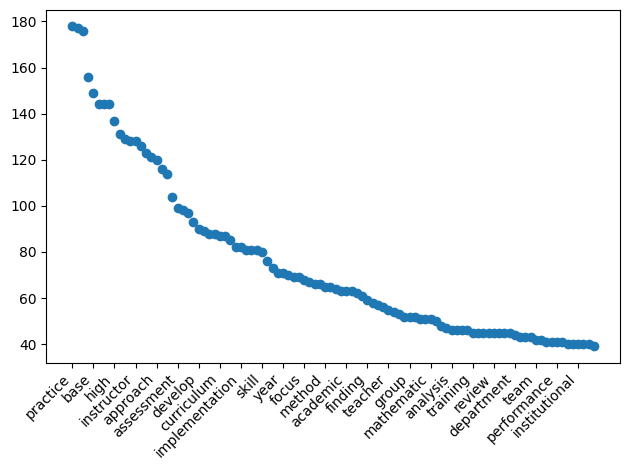

In [47]:
data_processed = []
# puncuation = [",",".",":","!",")","(",'"','?','-',"'"] #  also why capital letters not same as lower case for sample 120(only lower case stop words)( not sure if it will make a big differnece ???
stop_words = stopwords.words('english')
stop_words = stop_words + stopwords_online + ['student', 'teaching','learning','education','study',
                                             'learn','university','college','undergraduate']
                                             

lemmatize = WordNetLemmatizer().lemmatize # also when lammatize, doesnt see Learn and lean as the same so how to lower case everything 


for num,doc in enumerate(data['abstract']):
    doc_out = []
    n_doc = nlp(doc) 

    ###
    for wd in n_doc:
        if wd.is_alpha == False:
            continue 
       
        lemmatized_word = wd.lemma_ 
        lemmatized_word=lemmatized_word.lower()
        if lemmatized_word not in stop_words:  # remove stopwords 

            doc_out = doc_out + [lemmatized_word.lower()] 
        else:
             continue
    data_processed.append(doc_out)

    
# creating corpus and dictionary
dit = corpora.Dictionary(data_processed)
corpus = [dit.doc2bow(line) for line in data_processed]
r_corpus = [[(dit[id], count) for id, count in line] for line in corpus]

#creating word and word count of whole data to graph.
word = []
word_count = []
for abstract in r_corpus:
    for pair in abstract:
        if pair[0] not in word:
            word.append(pair[0])
            word_count.append(pair[1])
        if pair[0] in word:
            word_count[word.index(pair[0])] +=pair[1]
#making dataframe            
bow=pd.DataFrame({'count': word_count}, index=word)
bow_50 = bow.sort_values(by='count', ascending=False)


plt.scatter (bow_50.index[:100],bow_50['count'][:100])
plt.xticks(rotation=45, ha='right') 
stride = 4  # Adjust this value as needed to make x axis more readable 
plt.gca().set_xticks(plt.gca().get_xticks()[::stride])
plt.tight_layout()
plt.show()

In [28]:
# for a in range(len(data_processed)) :
#     for b in range(len(data_processed[a])):
#         if data_processed[a][b]=='science':
#             print(a,b)
First run this with the 650 data set to see changes  
        
MAke a list of (with 5 variable) the parameter from (decay,offset,gama,alpha) variation (look into the variables and what they casue and limits )


SyntaxError: invalid syntax (3820207855.py, line 5)

In [48]:
lda_model = gn.models.LdaMulticore(corpus=corpus,
                         id2word=dit,
                         random_state=100,
                         num_topics=5,
                         passes=10,
                         chunksize=1000,
                         batch=False,
                         alpha='asymmetric',
                         decay=0.5,
                         offset=64,
                         eta=None,
                         eval_every=0,
                         iterations=100,
                         gamma_threshold=0.001,
                         per_word_topics=True)


# See the topics
lda_model.print_topics(-1)



2024-04-24 09:25:22,394 : INFO : using asymmetric alpha [0.33283758, 0.22998512, 0.17569299, 0.14213862, 0.11934563]
2024-04-24 09:25:22,395 : INFO : using symmetric eta at 0.2
2024-04-24 09:25:22,397 : INFO : using serial LDA version on this node
2024-04-24 09:25:22,400 : INFO : running online LDA training, 5 topics, 10 passes over the supplied corpus of 191 documents, updating every 55000 documents, evaluating every ~0 documents, iterating 100x with a convergence threshold of 0.001000
2024-04-24 09:25:22,401 : INFO : training LDA model using 55 processes
2024-04-24 09:25:22,855 : INFO : PROGRESS: pass 0, dispatched chunk #0 = documents up to #191/191, outstanding queue size 1
2024-04-24 09:25:23,069 : INFO : topic #0 (0.333): 0.002*"change" + 0.002*"approach" + 0.002*"science" + 0.002*"support" + 0.001*"development" + 0.001*"model" + 0.001*"high" + 0.001*"community" + 0.001*"stem" + 0.001*"technology"
2024-04-24 09:25:23,071 : INFO : topic #1 (0.230): 0.001*"base" + 0.001*"community"

[(0,
  '0.007*"design" + 0.007*"practice" + 0.007*"faculty" + 0.007*"base" + 0.007*"science" + 0.007*"change" + 0.007*"engineering" + 0.006*"technology" + 0.006*"model" + 0.006*"program"'),
 (1,
  '0.003*"exempt" + 0.002*"english" + 0.002*"mars" + 0.001*"diagenetic" + 0.001*"mineral" + 0.001*"sb" + 0.001*"developmental" + 0.001*"reform" + 0.001*"math" + 0.001*"enrol"'),
 (2,
  '0.014*"online" + 0.010*"instructor" + 0.007*"educator" + 0.006*"practice" + 0.006*"active" + 0.005*"faculty" + 0.005*"teach" + 0.004*"educational" + 0.004*"design" + 0.004*"gamification"'),
 (3,
  '0.002*"osrs" + 0.001*"program" + 0.001*"design" + 0.001*"base" + 0.001*"experience" + 0.001*"online" + 0.001*"model" + 0.001*"quantitative" + 0.001*"communication" + 0.001*"technology"'),
 (4,
  '0.003*"wac" + 0.003*"traffic" + 0.002*"faculty" + 0.002*"online" + 0.001*"city" + 0.001*"urban" + 0.001*"program" + 0.001*"space" + 0.001*"practice" + 0.001*"active"')]

# Running LDA with large data set of 694

2024-04-24 11:07:21,004 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2024-04-24 11:07:21,066 : INFO : built Dictionary<8401 unique tokens: ['addition', 'approach', 'art', 'assignment', 'atmosphere']...> from 695 documents (total 73166 corpus positions)
2024-04-24 11:07:21,068 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<8401 unique tokens: ['addition', 'approach', 'art', 'assignment', 'atmosphere']...> from 695 documents (total 73166 corpus positions)", 'datetime': '2024-04-24T11:07:21.067938', 'gensim': '4.2.0', 'python': '3.7.3 (default, Mar 27 2019, 22:11:17) \n[GCC 7.3.0]', 'platform': 'Linux-4.15.0-175-generic-x86_64-with-debian-buster-sid', 'event': 'created'}


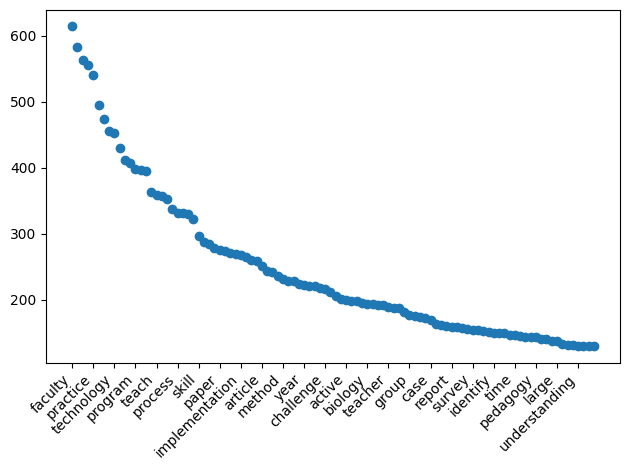

In [130]:
data_processed = []
# puncuation = [",",".",":","!",")","(",'"','?','-',"'"] #  also why capital letters not same as lower case for sample 120(only lower case stop words)( not sure if it will make a big differnece ???

                                             

 # also when lammatize, doesnt see Learn and lean as the same so how to lower case everything 


for num,doc in enumerate(data2['abstract']):
    doc_out = []
    n_doc = nlp(doc) 

    ###
    for wd in n_doc:
        if wd.is_alpha == False:
            continue 
       
        lemmatized_word = wd.lemma_ 
        lemmatized_word=lemmatized_word.lower()
        if lemmatized_word not in stop_words:  # remove stopwords 

            doc_out = doc_out + [lemmatized_word.lower()] 
        else:
             continue
    data_processed.append(doc_out)

    
# creating corpus and dictionary
dit2 = corpora.Dictionary(data_processed)
corpus2 = [dit2.doc2bow(line) for line in data_processed]
r_corpus2 = [[(dit2[id], count) for id, count in line] for line in corpus2]

#creating word and word count of whole data to graph.
word = []
word_count = []
for abstract in r_corpus2:
    for pair in abstract:
        if pair[0] not in word:
            word.append(pair[0])
            word_count.append(pair[1])
        if pair[0] in word:
            word_count[word.index(pair[0])] +=pair[1]
#making dataframe            
bow2=pd.DataFrame({'count': word_count}, index=word)
bow_502 = bow2.sort_values(by='count', ascending=False)


plt.scatter (bow_502.index[:100],bow_502['count'][:100])
plt.xticks(rotation=45, ha='right') 
stride = 4  # Adjust this value as needed to make x axis more readable 
plt.gca().set_xticks(plt.gca().get_xticks()[::stride])
plt.tight_layout()
plt.show()

In [144]:
lda_model2 = gn.models.LdaMulticore(corpus=corpus2,
                         id2word=dit2,
                         random_state=100,
                         num_topics=5,
                         passes=10,
                         batch=False,
                         alpha='asymmetric',
                         decay=0.5,
                         offset=64,
                         eta=None,
                        
                         iterations=100,
                         gamma_threshold=0.001,
                         per_word_topics=True)

2024-04-24 11:12:08,031 : INFO : using asymmetric alpha [0.33283758, 0.22998512, 0.17569299, 0.14213862, 0.11934563]
2024-04-24 11:12:08,033 : INFO : using symmetric eta at 0.2
2024-04-24 11:12:08,037 : INFO : using serial LDA version on this node
2024-04-24 11:12:08,044 : INFO : running online LDA training, 5 topics, 20 passes over the supplied corpus of 695 documents, updating every 110000 documents, evaluating every ~695 documents, iterating 100x with a convergence threshold of 0.001000
2024-04-24 11:12:08,047 : INFO : training LDA model using 55 processes
2024-04-24 11:12:08,688 : INFO : PROGRESS: pass 0, dispatched chunk #0 = documents up to #695/695, outstanding queue size 1
2024-04-24 11:12:09,405 : INFO : topic #0 (0.333): 0.004*"faculty" + 0.003*"design" + 0.003*"development" + 0.002*"online" + 0.002*"practice" + 0.002*"high" + 0.002*"engineering" + 0.002*"change" + 0.002*"support" + 0.002*"base"
2024-04-24 11:12:09,408 : INFO : topic #1 (0.230): 0.001*"approach" + 0.001*"desi

In [145]:
lda_model2.show_topics()

[(0,
  '0.008*"faculty" + 0.008*"design" + 0.007*"science" + 0.007*"development" + 0.007*"practice" + 0.007*"high" + 0.006*"base" + 0.006*"engineering" + 0.006*"technology" + 0.006*"change"'),
 (1,
  '0.006*"vocational" + 0.004*"cooperation" + 0.003*"labour" + 0.003*"white" + 0.002*"pla" + 0.002*"market" + 0.001*"complicity" + 0.001*"supremacy" + 0.001*"whiteness" + 0.001*"niceness"'),
 (2,
  '0.006*"feedback" + 0.006*"loop" + 0.004*"didactic" + 0.004*"outer" + 0.004*"igd" + 0.003*"pencast" + 0.003*"intergroup" + 0.003*"lecture" + 0.002*"dlpp" + 0.002*"epistemological"'),
 (3,
  '0.001*"practice" + 0.000*"faculty" + 0.000*"development" + 0.000*"experience" + 0.000*"community" + 0.000*"science" + 0.000*"change" + 0.000*"provide" + 0.000*"design" + 0.000*"support"'),
 (4,
  '0.005*"edp" + 0.003*"cloud" + 0.001*"science" + 0.001*"computing" + 0.001*"based" + 0.001*"ahmad" + 0.001*"base" + 0.001*"high" + 0.001*"provide" + 0.001*"program"')]

# Changing parameters from LDA model

In [146]:
decay=[0.5,0.6,0.7,0.8,0.9]
offset=[1,10,100,1000,10000]
iteration =[50,100,200,400,600]
gamma=[0.1,0.01,0.001,0.0001,0.00001]
pas=[5,10,15,20,25]
# lis=[decay,offset,iteration,gamma,pas]
# lis2=[de,of,it,ga]
de=[]
of=[]
it=[]
ga=[]
pa=[]
   
    



for i in decay:
    
    lda_model = gn.models.LdaMulticore(corpus=corpus2,
                         id2word=dit2,
                         random_state=100,
                         num_topics=5,
                        passes=10,
                         batch=False,
                         alpha='asymmetric',
                         decay=i,
                         offset=64,
                         eta=None,
                         iterations=1000,
                         gamma_threshold=0.001,
                         per_word_topics=True)
    de.append(lda_model.show_topics())
    
for i in offset:
    
    lda_model = gn.models.LdaMulticore(corpus=corpus2,
                         id2word=dit2,
                         random_state=100,
                         num_topics=5,
                        passes=10,
                         batch=False,
                         alpha='asymmetric',
                         decay=0.5,
                         offset=i,
                         eta=None,
                         iterations=1000,
                         gamma_threshold=0.001,
                         per_word_topics=True)
    of.append(lda_model.show_topics())
    
for i in iteration:
    
    lda_model = gn.models.LdaMulticore(corpus=corpus2,
                         id2word=dit2,
                         random_state=100,
                         num_topics=5,
                        passes=10,
                         batch=False,
                         alpha='asymmetric',
                         decay=0.5,
                         offset=64,
                         eta=None,
                         iterations=i,
                         gamma_threshold=0.001,
                         per_word_topics=True)
    it.append(lda_model.show_topics())
    
for i in gamma:
    
    lda_model = gn.models.LdaMulticore(corpus=corpus2,
                         id2word=dit2,
                         random_state=100,
                         num_topics=5,
                        passes=10,
                         batch=False,
                         alpha='asymmetric',
                         decay=0.5,
                         offset=64,
                         eta=None,
                         iterations=1000,
                         gamma_threshold=i,
                         per_word_topics=True)
    ga.append(lda_model.show_topics())

for i in pas:
    
    lda_model = gn.models.LdaMulticore(corpus=corpus2,
                         id2word=dit2,
                         random_state=100,
                         num_topics=5,
                        passes=i,
                         batch=False,
                         alpha='asymmetric',
                         decay=0.5,
                         offset=64,
                         eta=None,
                         iterations=1000,
                         gamma_threshold=0.001,
                         per_word_topics=True)
    pa.append(lda_model.show_topics())
    
# decay ranges from 0.5->1
#offset ranges from
#eval_every is questionable
# iterations range from 50-1000
#gamma can be 0.0001,0.00001,0.001,0.01


#after you figure out parameters, remove the radom state and get a random generation of all th topics 
#that are inside of selected parameters



2024-04-24 11:15:08,999 : INFO : using asymmetric alpha [0.33283758, 0.22998512, 0.17569299, 0.14213862, 0.11934563]
2024-04-24 11:15:09,002 : INFO : using symmetric eta at 0.2
2024-04-24 11:15:09,005 : INFO : using serial LDA version on this node
2024-04-24 11:15:09,011 : INFO : running online LDA training, 5 topics, 10 passes over the supplied corpus of 695 documents, updating every 110000 documents, evaluating every ~695 documents, iterating 1000x with a convergence threshold of 0.001000
2024-04-24 11:15:09,014 : INFO : training LDA model using 55 processes
2024-04-24 11:15:09,702 : INFO : PROGRESS: pass 0, dispatched chunk #0 = documents up to #695/695, outstanding queue size 1
2024-04-24 11:15:12,168 : INFO : topic #0 (0.333): 0.004*"faculty" + 0.003*"design" + 0.003*"development" + 0.003*"online" + 0.002*"engineering" + 0.002*"high" + 0.002*"practice" + 0.002*"change" + 0.002*"support" + 0.002*"base"
2024-04-24 11:15:12,172 : INFO : topic #1 (0.230): 0.001*"approach" + 0.001*"tec

# comparing the 2 extremes of 0.5 decay and 1

In [156]:
de[2]
# 0.7(de[2]) decay makes the most sense. when you go above .7 you start to lose info 

[(0,
  '0.007*"faculty" + 0.006*"design" + 0.006*"development" + 0.006*"science" + 0.006*"practice" + 0.006*"high" + 0.005*"base" + 0.005*"engineering" + 0.005*"technology" + 0.005*"change"'),
 (1,
  '0.001*"approach" + 0.001*"technology" + 0.001*"change" + 0.001*"design" + 0.000*"high" + 0.000*"stem" + 0.000*"practice" + 0.000*"educational" + 0.000*"process" + 0.000*"develop"'),
 (2,
  '0.001*"loop" + 0.001*"feedback" + 0.001*"classroom" + 0.001*"outer" + 0.001*"science" + 0.001*"technology" + 0.001*"base" + 0.001*"development" + 0.001*"design" + 0.001*"practice"'),
 (3,
  '0.001*"practice" + 0.000*"faculty" + 0.000*"development" + 0.000*"community" + 0.000*"experience" + 0.000*"change" + 0.000*"engineering" + 0.000*"provide" + 0.000*"support" + 0.000*"design"'),
 (4,
  '0.001*"science" + 0.001*"base" + 0.001*"high" + 0.001*"model" + 0.001*"program" + 0.001*"level" + 0.001*"provide" + 0.001*"development" + 0.001*"experience" + 0.001*"technology"')]

In [159]:
de[4]

[(0,
  '0.005*"faculty" + 0.005*"design" + 0.005*"development" + 0.005*"science" + 0.005*"practice" + 0.004*"high" + 0.004*"base" + 0.004*"engineering" + 0.004*"technology" + 0.004*"change"'),
 (1,
  '0.000*"approach" + 0.000*"technology" + 0.000*"change" + 0.000*"design" + 0.000*"stem" + 0.000*"high" + 0.000*"educational" + 0.000*"practice" + 0.000*"include" + 0.000*"instructor"'),
 (2,
  '0.000*"classroom" + 0.000*"science" + 0.000*"technology" + 0.000*"base" + 0.000*"model" + 0.000*"practice" + 0.000*"development" + 0.000*"design" + 0.000*"project" + 0.000*"datum"'),
 (3,
  '0.000*"practice" + 0.000*"faculty" + 0.000*"development" + 0.000*"experience" + 0.000*"community" + 0.000*"change" + 0.000*"engineering" + 0.000*"provide" + 0.000*"intervention" + 0.000*"instructional"'),
 (4,
  '0.001*"science" + 0.000*"base" + 0.000*"high" + 0.000*"level" + 0.000*"provide" + 0.000*"model" + 0.000*"program" + 0.000*"development" + 0.000*"technology" + 0.000*"project"')]

In [108]:
# ask danny if i should de permutations for every possibel combination?
# after figuring out the parameteres, will it be better to run the best 2 parameters without random state 
#and creat a frequency plot of that ? to see which parameter is better? 

# comparing Passes parameters 

In [165]:
pa[0]

[(0,
  '0.007*"faculty" + 0.007*"design" + 0.007*"development" + 0.006*"practice" + 0.006*"science" + 0.006*"high" + 0.005*"base" + 0.005*"engineering" + 0.005*"technology" + 0.005*"change"'),
 (1,
  '0.001*"approach" + 0.001*"technology" + 0.001*"vocational" + 0.001*"change" + 0.001*"design" + 0.001*"high" + 0.001*"stem" + 0.001*"educational" + 0.001*"practice" + 0.001*"process"'),
 (2,
  '0.002*"classroom" + 0.002*"feedback" + 0.002*"science" + 0.001*"loop" + 0.001*"project" + 0.001*"development" + 0.001*"base" + 0.001*"technology" + 0.001*"model" + 0.001*"design"'),
 (3,
  '0.001*"practice" + 0.001*"faculty" + 0.001*"development" + 0.001*"community" + 0.001*"experience" + 0.001*"change" + 0.001*"engineering" + 0.001*"provide" + 0.001*"design" + 0.001*"science"'),
 (4,
  '0.003*"science" + 0.002*"base" + 0.001*"black" + 0.001*"model" + 0.001*"high" + 0.001*"level" + 0.001*"provide" + 0.001*"program" + 0.001*"development" + 0.001*"experience"')]

In [168]:
pa[1]

[(0,
  '0.008*"faculty" + 0.007*"design" + 0.007*"development" + 0.007*"science" + 0.007*"practice" + 0.006*"high" + 0.006*"base" + 0.006*"engineering" + 0.006*"technology" + 0.006*"change"'),
 (1,
  '0.002*"vocational" + 0.001*"white" + 0.001*"labour" + 0.001*"cooperation" + 0.001*"multicultural" + 0.001*"approach" + 0.001*"technology" + 0.001*"change" + 0.001*"design" + 0.001*"mars"'),
 (2,
  '0.003*"feedback" + 0.003*"loop" + 0.002*"didactic" + 0.002*"outer" + 0.002*"igd" + 0.001*"classroom" + 0.001*"science" + 0.001*"intergroup" + 0.001*"lecture" + 0.001*"black"'),
 (3,
  '0.001*"traffic" + 0.001*"practice" + 0.001*"faculty" + 0.001*"development" + 0.001*"community" + 0.001*"experience" + 0.001*"change" + 0.001*"engineering" + 0.000*"provide" + 0.000*"develop"'),
 (4,
  '0.003*"black" + 0.003*"science" + 0.002*"edp" + 0.001*"pencast" + 0.001*"base" + 0.001*"model" + 0.001*"level" + 0.001*"programming" + 0.001*"high" + 0.001*"spatial"')]

In [169]:
da_model = gn.models.LdaMulticore(corpus=corpus2,
                         id2word=dit2,
                         random_state=100,
                         num_topics=5,
                        passes=1,
                         batch=False,
                         alpha='asymmetric',
                         decay=0.5,
                         offset=64,
                         eta=None,
                         iterations=1000,
                         gamma_threshold=0.001,
                         per_word_topics=True)
lda_model.show_topics()

2024-04-24 11:32:30,290 : INFO : using asymmetric alpha [0.33283758, 0.22998512, 0.17569299, 0.14213862, 0.11934563]
2024-04-24 11:32:30,292 : INFO : using symmetric eta at 0.2
2024-04-24 11:32:30,298 : INFO : using serial LDA version on this node
2024-04-24 11:32:30,306 : INFO : running online LDA training, 5 topics, 1 passes over the supplied corpus of 695 documents, updating every 110000 documents, evaluating every ~695 documents, iterating 1000x with a convergence threshold of 0.001000
2024-04-24 11:32:30,307 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2024-04-24 11:32:30,309 : INFO : training LDA model using 55 processes
2024-04-24 11:32:30,984 : INFO : PROGRESS: pass 0, dispatched chunk #0 = documents up to #695/695, outstanding queue size 1
2024-04-24 11:32:33,256 : INFO : topic #0 (0.333): 0.004*"faculty" + 0.003*"design" + 0.003*"development" + 0.003*"online" + 0.002*"engineering" + 0.002*

[(0,
  '0.004*"faculty" + 0.004*"design" + 0.004*"development" + 0.004*"science" + 0.004*"practice" + 0.004*"high" + 0.003*"base" + 0.003*"engineering" + 0.003*"technology" + 0.003*"change"'),
 (1,
  '0.000*"approach" + 0.000*"change" + 0.000*"technology" + 0.000*"design" + 0.000*"stem" + 0.000*"high" + 0.000*"include" + 0.000*"educational" + 0.000*"instructor" + 0.000*"active"'),
 (2,
  '0.000*"classroom" + 0.000*"science" + 0.000*"technology" + 0.000*"base" + 0.000*"model" + 0.000*"practice" + 0.000*"development" + 0.000*"design" + 0.000*"datum" + 0.000*"project"'),
 (3,
  '0.000*"practice" + 0.000*"faculty" + 0.000*"experience" + 0.000*"development" + 0.000*"community" + 0.000*"change" + 0.000*"intervention" + 0.000*"instructional" + 0.000*"provide" + 0.000*"engineering"'),
 (4,
  '0.000*"science" + 0.000*"base" + 0.000*"high" + 0.000*"level" + 0.000*"provide" + 0.000*"model" + 0.000*"program" + 0.000*"project" + 0.000*"technology" + 0.000*"change"')]

In [170]:
# for passes, its seems like the lower option is clearer but misses out on some target words. 

# testing Gamma parameters 

In [171]:
ga[0]

[(0,
  '0.008*"faculty" + 0.007*"design" + 0.007*"development" + 0.007*"science" + 0.007*"practice" + 0.006*"high" + 0.006*"base" + 0.006*"engineering" + 0.006*"technology" + 0.005*"change"'),
 (1,
  '0.002*"vocational" + 0.001*"labour" + 0.001*"white" + 0.001*"cooperation" + 0.001*"approach" + 0.001*"pla" + 0.001*"design" + 0.001*"technology" + 0.001*"high" + 0.001*"change"'),
 (2,
  '0.003*"loop" + 0.003*"feedback" + 0.002*"outer" + 0.002*"didactic" + 0.002*"igd" + 0.001*"classroom" + 0.001*"technology" + 0.001*"science" + 0.001*"intergroup" + 0.001*"base"'),
 (3,
  '0.001*"practice" + 0.001*"faculty" + 0.001*"development" + 0.001*"experience" + 0.001*"science" + 0.001*"change" + 0.000*"community" + 0.000*"support" + 0.000*"provide" + 0.000*"design"'),
 (4,
  '0.002*"science" + 0.002*"edp" + 0.001*"base" + 0.001*"high" + 0.001*"program" + 0.001*"model" + 0.001*"cloud" + 0.001*"provide" + 0.001*"level" + 0.001*"development"')]

In [172]:
ga[4]

[(0,
  '0.008*"faculty" + 0.007*"design" + 0.007*"development" + 0.007*"science" + 0.007*"practice" + 0.006*"high" + 0.006*"base" + 0.006*"engineering" + 0.006*"technology" + 0.006*"change"'),
 (1,
  '0.002*"vocational" + 0.001*"white" + 0.001*"labour" + 0.001*"cooperation" + 0.001*"multicultural" + 0.001*"technology" + 0.001*"approach" + 0.001*"change" + 0.001*"design" + 0.001*"mars"'),
 (2,
  '0.003*"feedback" + 0.003*"loop" + 0.002*"didactic" + 0.002*"outer" + 0.002*"igd" + 0.001*"classroom" + 0.001*"science" + 0.001*"intergroup" + 0.001*"lecture" + 0.001*"black"'),
 (3,
  '0.001*"traffic" + 0.001*"practice" + 0.001*"faculty" + 0.001*"development" + 0.001*"community" + 0.001*"experience" + 0.001*"change" + 0.001*"engineering" + 0.000*"provide" + 0.000*"develop"'),
 (4,
  '0.003*"black" + 0.003*"science" + 0.002*"edp" + 0.001*"pencast" + 0.001*"base" + 0.001*"model" + 0.001*"level" + 0.001*"programming" + 0.001*"high" + 0.001*"spatial"')]

# testing offset 

In [173]:
of[0]

[(0,
  '0.015*"faculty" + 0.010*"design" + 0.010*"development" + 0.010*"online" + 0.009*"practice" + 0.008*"engineering" + 0.008*"high" + 0.007*"support" + 0.007*"instructor" + 0.007*"technology"'),
 (1,
  '0.008*"approach" + 0.007*"technology" + 0.007*"change" + 0.007*"design" + 0.006*"high" + 0.006*"stem" + 0.005*"process" + 0.005*"educational" + 0.005*"practice" + 0.005*"provide"'),
 (2,
  '0.009*"classroom" + 0.009*"science" + 0.007*"datum" + 0.007*"base" + 0.007*"design" + 0.007*"model" + 0.007*"development" + 0.006*"project" + 0.006*"practice" + 0.005*"technology"'),
 (3,
  '0.009*"practice" + 0.007*"faculty" + 0.006*"community" + 0.005*"experience" + 0.005*"engineering" + 0.005*"change" + 0.005*"math" + 0.004*"provide" + 0.004*"framework" + 0.004*"level"'),
 (4,
  '0.012*"science" + 0.007*"base" + 0.007*"high" + 0.005*"model" + 0.005*"experience" + 0.005*"provide" + 0.005*"program" + 0.005*"level" + 0.005*"assessment" + 0.005*"development"')]

In [174]:
of[4]

[(0,
  '0.004*"faculty" + 0.003*"design" + 0.003*"development" + 0.003*"science" + 0.003*"practice" + 0.003*"high" + 0.003*"base" + 0.003*"engineering" + 0.003*"technology" + 0.003*"change"'),
 (1,
  '0.000*"approach" + 0.000*"change" + 0.000*"technology" + 0.000*"design" + 0.000*"include" + 0.000*"stem" + 0.000*"instructor" + 0.000*"educational" + 0.000*"high" + 0.000*"active"'),
 (2,
  '0.000*"classroom" + 0.000*"science" + 0.000*"technology" + 0.000*"model" + 0.000*"base" + 0.000*"datum" + 0.000*"project" + 0.000*"practice" + 0.000*"development" + 0.000*"design"'),
 (3,
  '0.000*"practice" + 0.000*"faculty" + 0.000*"experience" + 0.000*"development" + 0.000*"intervention" + 0.000*"community" + 0.000*"instructional" + 0.000*"change" + 0.000*"critical" + 0.000*"provide"'),
 (4,
  '0.000*"science" + 0.000*"level" + 0.000*"base" + 0.000*"provide" + 0.000*"high" + 0.000*"model" + 0.000*"program" + 0.000*"project" + 0.000*"technology" + 0.000*"curriculum"')]

# testing iteration 

In [175]:
it[0]

[(0,
  '0.008*"faculty" + 0.007*"design" + 0.007*"science" + 0.007*"development" + 0.007*"practice" + 0.006*"high" + 0.006*"base" + 0.006*"engineering" + 0.006*"technology" + 0.005*"change"'),
 (1,
  '0.001*"pla" + 0.001*"white" + 0.001*"design" + 0.001*"approach" + 0.001*"high" + 0.001*"technology" + 0.001*"change" + 0.001*"model" + 0.001*"stem" + 0.001*"practice"'),
 (2,
  '0.003*"loop" + 0.003*"feedback" + 0.002*"didactic" + 0.002*"outer" + 0.001*"classroom" + 0.001*"pencast" + 0.001*"science" + 0.001*"model" + 0.001*"technology" + 0.001*"paper"'),
 (3,
  '0.001*"practice" + 0.001*"faculty" + 0.001*"development" + 0.001*"science" + 0.001*"experience" + 0.001*"design" + 0.001*"change" + 0.001*"provide" + 0.001*"high" + 0.001*"support"'),
 (4,
  '0.002*"edp" + 0.002*"science" + 0.001*"high" + 0.001*"base" + 0.001*"provide" + 0.001*"program" + 0.001*"development" + 0.001*"model" + 0.001*"curriculum" + 0.001*"level"')]

In [176]:
it[4]

[(0,
  '0.008*"faculty" + 0.007*"design" + 0.007*"development" + 0.007*"science" + 0.007*"practice" + 0.006*"high" + 0.006*"base" + 0.006*"engineering" + 0.006*"technology" + 0.006*"change"'),
 (1,
  '0.002*"vocational" + 0.001*"white" + 0.001*"labour" + 0.001*"cooperation" + 0.001*"approach" + 0.001*"technology" + 0.001*"change" + 0.001*"design" + 0.001*"high" + 0.001*"mars"'),
 (2,
  '0.003*"feedback" + 0.003*"loop" + 0.002*"didactic" + 0.002*"outer" + 0.002*"igd" + 0.001*"classroom" + 0.001*"science" + 0.001*"lecture" + 0.001*"intergroup" + 0.001*"project"'),
 (3,
  '0.001*"practice" + 0.001*"faculty" + 0.001*"development" + 0.001*"community" + 0.001*"experience" + 0.001*"change" + 0.000*"provide" + 0.000*"engineering" + 0.000*"science" + 0.000*"design"'),
 (4,
  '0.003*"black" + 0.003*"science" + 0.002*"edp" + 0.001*"pencast" + 0.001*"base" + 0.001*"model" + 0.001*"level" + 0.001*"spatial" + 0.001*"high" + 0.001*"space"')]